In [22]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import os

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)
    
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image.astype(np.uint8),interpolation="nearest")
    plt.axis("off")

import datetime
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#Import tensorflow
import tensorflow as tf
from tensorflow import keras  
from tensorflow.keras import layers  

#image preprocessing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#CNN building
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow import keras


In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

import os
import zipfile
zip_path = "/Users/test/Desktop/Data_Science/AI Certificate/Deep Learning/M3 CNNs/Waste Recognition/archive.zip"
zip_ref = zipfile.ZipFile(zip_path,'r')
zip_ref.extractall('/Users/test/Desktop/Data_Science/AI Certificate/Deep Learning/M3 CNNs/Waste Recognition/waste')
zip_ref.close()

In [3]:
base_dir = 'C:\\Users\VR\DataScience\Waste Recognition\waste'
train_dir = os.path.join(base_dir, 'TRAIN')
test_dir = os.path.join(base_dir, 'TEST')

In [4]:
train_org_dir = os.path.join(train_dir,'O')
train_rec_dir = os.path.join(train_dir,'R')
test_org_dir = os.path.join(test_dir,'O')
test_rec_dir = os.path.join(test_dir,'R')

In [5]:
train_org_fnames = os.listdir(train_org_dir)
print(train_org_fnames[:10])

train_rec_fnames = os.listdir(train_rec_dir)

['O_1.jpg', 'O_10.jpg', 'O_100.jpg', 'O_1000.jpg', 'O_10000.jpg', 'O_10001.jpg', 'O_10002.jpg', 'O_10003.jpg', 'O_10004.jpg', 'O_10005.jpg']


In [6]:
print('total training organic images:', len(os.listdir(train_org_dir)))
print('total training recyclable images:', len(os.listdir(train_rec_dir)))

print('total test organic images:', len(os.listdir(test_org_dir)))
print('total test recyclable images:', len(os.listdir(test_rec_dir)))
print('organic to recyclable ratio',(len(os.listdir(train_rec_dir))+len(os.listdir(test_rec_dir)))/
      (len(os.listdir(train_org_dir))+len(os.listdir(test_org_dir))))
#The dataset is fairly balanced, we don't need to do special preprocessing and can use accuracy as a metric

total training organic images: 12565
total training recyclable images: 9999
total test organic images: 1401
total test recyclable images: 1112
organic to recyclable ratio 0.7955749677788916


total = len(os.listdir(train_org_dir))+len(os.listdir(train_rec_dir))
class_w0 = total/(2*len(os.listdir(train_org_dir)))
class_w1 = total/(2*len(os.listdir(train_rec_dir)))
print(total,class_w0,class_w1)

class_weights = {0:class_w0, 1:class_w1}
class_weights

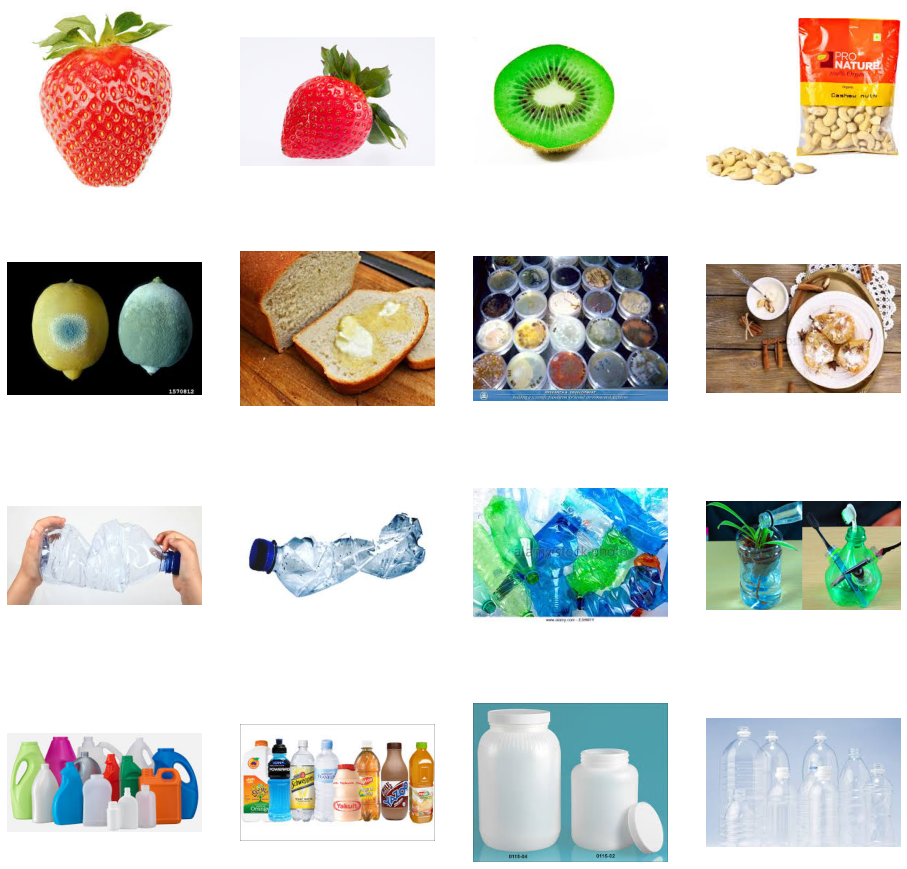

In [7]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_org_pic = [os.path.join(train_org_dir,fname)
                            for fname in train_org_fnames[pic_index-8:pic_index]]
next_rec_pic = [os.path.join(train_rec_dir,fname)
               for fname in train_rec_fnames[pic_index-8:pic_index]]
for i, img_path in enumerate(next_org_pic+next_rec_pic):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()
                             


In [8]:
batch_size = 64
image_size = (180,180)

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
  validation_split=0.2,
  subset="training",
  seed=62,
  image_size=image_size,
batch_size = batch_size)

Found 22564 files belonging to 2 classes.
Using 18052 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=62,
  image_size=image_size,
batch_size = batch_size)

Found 22564 files belonging to 2 classes.
Using 4512 files for validation.


In [11]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=62,
  image_size=image_size)

Found 2513 files belonging to 2 classes.


In [12]:
class_names = train_ds.class_names
print(class_names)

['O', 'R']


In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 180, 180, 3)
(64,)


for images, labels in train_ds.take(1):  # only take first element of dataset
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
numpy_labels

i = 0
for batch in train_ds:
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0][0]))
    i+=1
    if i==7:
        break

AUTOTUNE = tf.data.AUTOTUNE
steps_per_epoch = len(train_ds)//batch_size//1000
val_steps = len(val_ds)//batch_size//1000

In [15]:
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 180, 180, 3)
(64,)


In [17]:
optimizer = "Adam"
activation = 'relu'
initializer = keras.initializers.he_normal
checkpoint_cb = keras.callbacks.ModelCheckpoint("cnn_waste", save_best_only = True)
early_stopping = keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True)

In [18]:
#baseline model - simple CNN from scratch - 4 conv layers, 2 MaxPool with dropout to combat overfitting

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(64, 5, activation=activation, kernel_initializer = initializer),
    tf.keras.layers.Conv2D(64, 5, activation=activation, kernel_initializer = initializer),
  tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(128, 3, activation=activation,kernel_initializer = initializer),
    tf.keras.layers.Conv2D(128, 3, activation=activation,kernel_initializer = initializer),
  tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=activation,kernel_initializer = initializer),
  tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [19]:
#optional reset of weights if wanted to try different hyperparameters on the same architecture
def reset_weights(model,initializer = keras.initializers.glorot_uniform):
    initial_weights = model.get_weights()
    new_weights = [(initializer()(w.shape)) for w in initial_weights]
    model.set_weights(new_weights)

In [20]:
#reset_weights(model,initializer)
model.compile(
  optimizer=optimizer,
  loss=tf.losses.BinaryCrossentropy(),
  metrics=['accuracy'])

In [ ]:
start_time = datetime.datetime.now()
history = model.fit(
  train_ds,
  validation_data=val_ds,
#steps_per_epoch = STEPS_PER_EPOCH,
    #validation_steps = val_steps,
  epochs=200, callbacks = [checkpoint_cb, early_stopping]
)
end_time = datetime.datetime.now()

Epoch 1/200
283/283 [==============================] - ETA: 0s - loss: 0.7666 - accuracy: 0.5574

INFO:tensorflow:Assets written to: cnn_waste\assets


INFO:tensorflow:Assets written to: cnn_waste\assets


283/283 [==============================] - 208s 735ms/step - loss: 0.7666 - accuracy: 0.5574 - val_loss: 0.6877 - val_accuracy: 0.5561
Epoch 2/200
283/283 [==============================] - ETA: 0s - loss: 0.6282 - accuracy: 0.6539

INFO:tensorflow:Assets written to: cnn_waste\assets


INFO:tensorflow:Assets written to: cnn_waste\assets


283/283 [==============================] - 210s 743ms/step - loss: 0.6282 - accuracy: 0.6539 - val_loss: 0.5416 - val_accuracy: 0.7560
Epoch 3/200
283/283 [==============================] - ETA: 0s - loss: 0.5460 - accuracy: 0.7371

INFO:tensorflow:Assets written to: cnn_waste\assets


INFO:tensorflow:Assets written to: cnn_waste\assets


283/283 [==============================] - 244s 862ms/step - loss: 0.5460 - accuracy: 0.7371 - val_loss: 0.5030 - val_accuracy: 0.7695
Epoch 4/200
283/283 [==============================] - 225s 794ms/step - loss: 0.5186 - accuracy: 0.7502 - val_loss: 0.5068 - val_accuracy: 0.7657
Epoch 5/200
283/283 [==============================] - ETA: 0s - loss: 0.5028 - accuracy: 0.7652

INFO:tensorflow:Assets written to: cnn_waste\assets


INFO:tensorflow:Assets written to: cnn_waste\assets


283/283 [==============================] - 236s 836ms/step - loss: 0.5028 - accuracy: 0.7652 - val_loss: 0.4770 - val_accuracy: 0.7768
Epoch 6/200
283/283 [==============================] - ETA: 0s - loss: 0.4934 - accuracy: 0.7737

INFO:tensorflow:Assets written to: cnn_waste\assets


INFO:tensorflow:Assets written to: cnn_waste\assets


283/283 [==============================] - 236s 832ms/step - loss: 0.4934 - accuracy: 0.7737 - val_loss: 0.4700 - val_accuracy: 0.7839
Epoch 7/200
283/283 [==============================] - ETA: 0s - loss: 0.4870 - accuracy: 0.7802

INFO:tensorflow:Assets written to: cnn_waste\assets


INFO:tensorflow:Assets written to: cnn_waste\assets


283/283 [==============================] - 247s 873ms/step - loss: 0.4870 - accuracy: 0.7802 - val_loss: 0.4663 - val_accuracy: 0.7888
Epoch 8/200
177/283 [=================>............] - ETA: 1:26 - loss: 0.4889 - accuracy: 0.7834

In [ ]:
time_diff = (end_time - start_time)
execution_time = time_diff.total_seconds() * 1000

print(time_diff,execution_time)

In [ ]:
model.save('CNN_from_scratch.h5')

In [ ]:
history.history.keys()

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(20, 10))
plt.grid(True)
plt.gca().set_ylim(0, 4)
plt.show()